In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
%matplotlib inline

In [92]:
path = r"C:\Users\justi\Citi Bike Analysis"

In [5]:
df=pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'cleaned_citibike_df.csv'))

In [6]:
df.shape

(50000, 19)

In [7]:
df.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                   int64
trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
dtype: object

In [9]:
df.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,0


In [10]:
df.isnull().sum()

Unnamed: 0                 0
trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
dtype: int64

In [11]:
df_dups=df[df.duplicated()]

In [12]:
df_dups.shape

(0, 19)

In [13]:
df['subscriber'] = df['subscriber'].replace({'subscriber': 0, 'non-subscriber': 1})

In [14]:
columns_to_remove = ['Unnamed: 0', 'trip_id', 'bike_id', 'start_station_id', 'start_station_name', 'end_station_id','end_station_name']

In [15]:
df_cleaned = df.drop(columns=columns_to_remove)

In [16]:
df_cleaned.head(10)

,weekday,start_hour,start_time,start_station_latitude,start_station_longitude,end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,Mon,18,2013-09-09 18:18:55,40.754666,-73.991382,2013-09-09 18:35:28,40.742388,-73.997262,993,Subscriber,1968.0,2
1,Thu,18,2013-09-12 18:38:53,40.719392,-74.002472,2013-09-12 18:48:34,40.728419,-73.987140,581,Subscriber,1983.0,1
2,Wed,19,2013-09-18 19:44:04,40.760193,-73.991255,2013-09-18 19:50:05,40.768254,-73.988639,361,Subscriber,1989.0,1
3,Sat,11,2013-09-28 11:54:37,40.743156,-73.974347,2013-09-28 12:03:58,40.756014,-73.967416,561,Subscriber,1988.0,2
4,Sat,18,2013-09-07 18:08:22,40.750450,-73.994811,2013-09-07 18:46:38,40.743943,-73.979661,2296,Non-Subscriber,1978.0,0
5,Fri,22,2013-09-27 22:01:01,40.730287,-73.990765,2013-09-27 22:08:08,40.726218,-73.983799,427,Subscriber,1986.0,2
6,Sun,13,2013-09-29 13:13:06,40.734011,-74.002939,2013-09-29 13:23:45,40.724537,-73.981854,639,Subscriber,1994.0,1
7,Sat,10,2013-09-21 10:48:14,40.736529,-74.006180,2013-09-21 10:52:37,40.743349,-74.006818,263,Subscriber,1969.0,1
8,Fri,12,2013-09-20 12:29:49,40.760660,-73.980420,2013-09-20 12:40:55,40.770513,-73.988038,666,Subscriber,1993.0,1
9,Tue,16,2013-09-03 16:56:06,40.744876,-73.995299,2013-09-03 17:05:48,40.717400,-73.980166,582,Subscriber,1983.0,1


In [17]:
df_cleaned['subscriber'] = df_cleaned['subscriber'].replace({'Subscriber': 0, 'Non-Subscriber': 1})

In [18]:
weekday_mapping = {
    'Mon': 0,
    'Tue': 1,
    'Wed': 2,
    'Thu': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6
}

df_cleaned['weekday'] = df_cleaned['weekday'].map(weekday_mapping)

In [19]:
df_cleaned.head()

,weekday,start_hour,start_time,start_station_latitude,start_station_longitude,end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,18,2013-09-09 18:18:55,40.754666,-73.991382,2013-09-09 18:35:28,40.742388,-73.997262,993,0,1968.0,2
1,3,18,2013-09-12 18:38:53,40.719392,-74.002472,2013-09-12 18:48:34,40.728419,-73.987140,581,0,1983.0,1
2,2,19,2013-09-18 19:44:04,40.760193,-73.991255,2013-09-18 19:50:05,40.768254,-73.988639,361,0,1989.0,1
3,5,11,2013-09-28 11:54:37,40.743156,-73.974347,2013-09-28 12:03:58,40.756014,-73.967416,561,0,1988.0,2
4,5,18,2013-09-07 18:08:22,40.750450,-73.994811,2013-09-07 18:46:38,40.743943,-73.979661,2296,1,1978.0,0


In [20]:
df_cleaned['start_time'] = pd.to_datetime(df_cleaned['start_time'])
df_cleaned['end_time'] = pd.to_datetime(df_cleaned['end_time'])


In [21]:
df_cleaned.corr()

,weekday,start_hour,start_time,start_station_latitude,start_station_longitude,end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
weekday,1.000000,0.005601,0.022954,-0.053146,-0.010987,0.023023,-0.047697,-0.013953,0.077492,0.136826,0.054482,-0.077819
start_hour,0.005601,1.000000,0.015801,-0.009121,-0.045734,0.015831,-0.036941,0.007160,0.040870,0.030995,0.062762,-0.013775
start_time,0.022954,0.015801,1.000000,-0.008482,0.002851,0.999998,-0.002373,0.006007,-0.020040,-0.043071,0.004159,0.031354
start_station_latitude,-0.053146,-0.009121,-0.008482,1.000000,0.211969,-0.008502,0.585463,0.078218,-0.025321,-0.038293,-0.044390,-0.012483
start_station_longitude,-0.010987,-0.045734,0.002851,0.211969,1.000000,0.002849,0.093074,0.418376,-0.007220,-0.031058,0.025165,0.011487
end_time,0.023023,0.015831,0.999998,-0.008502,0.002849,1.000000,-0.002411,0.006029,-0.018934,-0.042738,0.004156,0.031159
end_station_latitude,-0.047697,-0.036941,-0.002373,0.585463,0.093074,-0.002411,1.000000,0.200080,-0.044033,-0.026207,-0.040259,-0.019365
end_station_longitude,-0.013953,0.007160,0.006007,0.078218,0.418376,0.006029,0.200080,1.000000,0.001111,-0.020906,0.035305,0.000796
trip_duration,0.077492,0.040870,-0.020040,-0.025321,-0.007220,-0.018934,-0.044033,0.001111,1.000000,0.295862,-0.016183,-0.157944
subscriber,0.136826,0.030995,-0.043071,-0.038293,-0.031058,-0.042738,-0.026207,-0.020906,0.295862,1.000000,0.079670,-0.733630


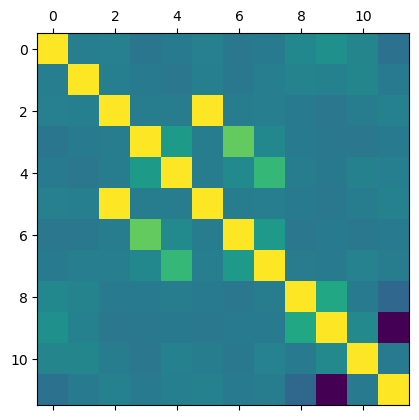

In [23]:
plt.matshow(df_cleaned.corr())
plt.show()

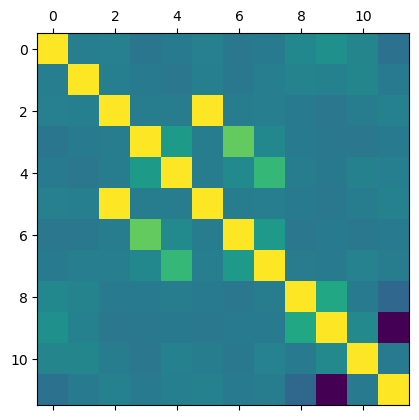

In [24]:
# Save figure
plt.matshow(df_cleaned.corr())
plt.savefig("out.png")

Text(0.5, 1.0, 'Correlation Matrix')

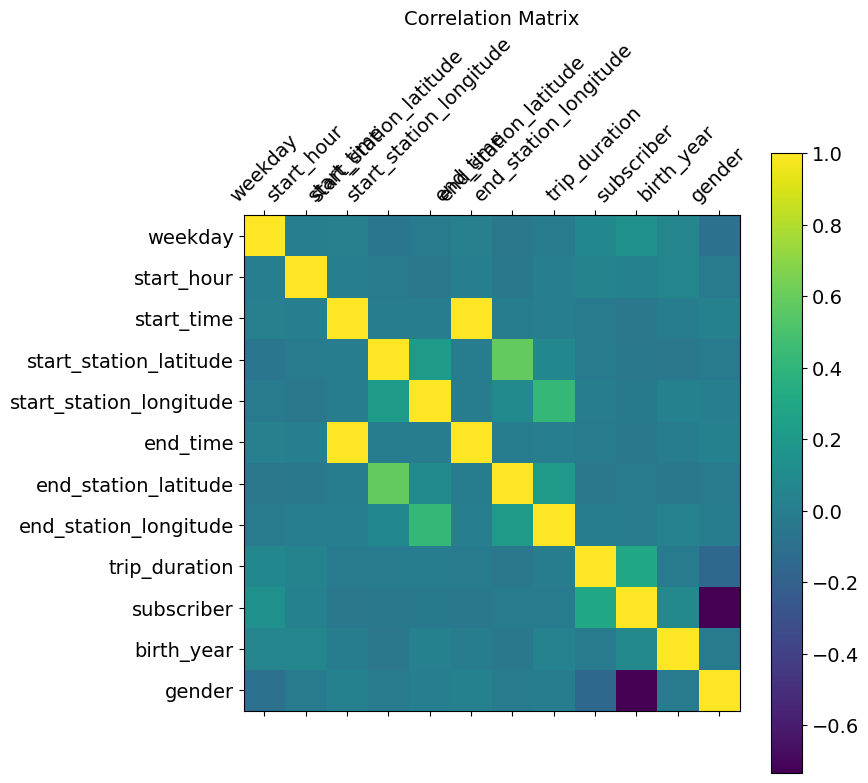

In [25]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_cleaned.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [26]:
df_cleaned.columns

Index(['weekday', 'start_hour', 'start_time', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender'],
      dtype='object')

In [77]:
sub=df_cleaned[['weekday','start_time','end_time','trip_duration','subscriber','gender', 'birth_year']]

In [78]:
sub

,weekday,start_time,end_time,trip_duration,subscriber,gender,birth_year
0,0,2013-09-09 18:18:55,2013-09-09 18:35:28,993,0,2,1968.0
1,3,2013-09-12 18:38:53,2013-09-12 18:48:34,581,0,1,1983.0
2,2,2013-09-18 19:44:04,2013-09-18 19:50:05,361,0,1,1989.0
3,5,2013-09-28 11:54:37,2013-09-28 12:03:58,561,0,2,1988.0
4,5,2013-09-07 18:08:22,2013-09-07 18:46:38,2296,1,0,1978.0
...,...,...,...,...,...,...,...
49995,5,2013-09-21 18:39:20,2013-09-21 20:08:59,2697,1,0,1978.0
49996,5,2013-09-14 17:32:26,2013-09-14 17:52:17,1191,0,2,1970.0
49997,5,2013-09-07 18:08:21,2013-09-07 18:25:51,1050,0,2,1961.0
49998,5,2013-09-07 13:25:35,2013-09-07 14:14:04,2697,1,0,1978.0


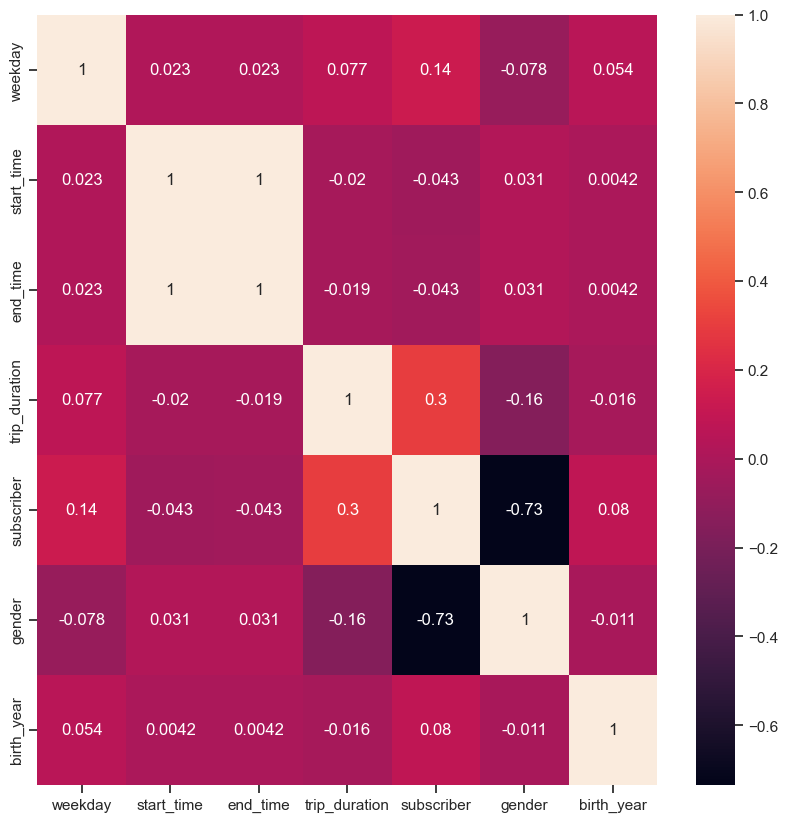

In [79]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

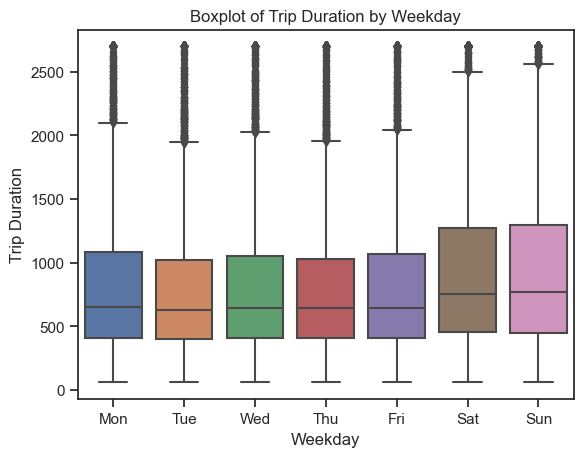

In [80]:
sns.boxplot(x='weekday', y='trip_duration', data=df_cleaned)
plt.xlabel('Weekday')
plt.ylabel('Trip Duration')
plt.title('Boxplot of Trip Duration by Weekday')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Assuming weekdays are mapped to 0-6
plt.show()

In [81]:
sub_2 = sub[['weekday', 'gender','subscriber', 'trip_duration','birth_year']]

C:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

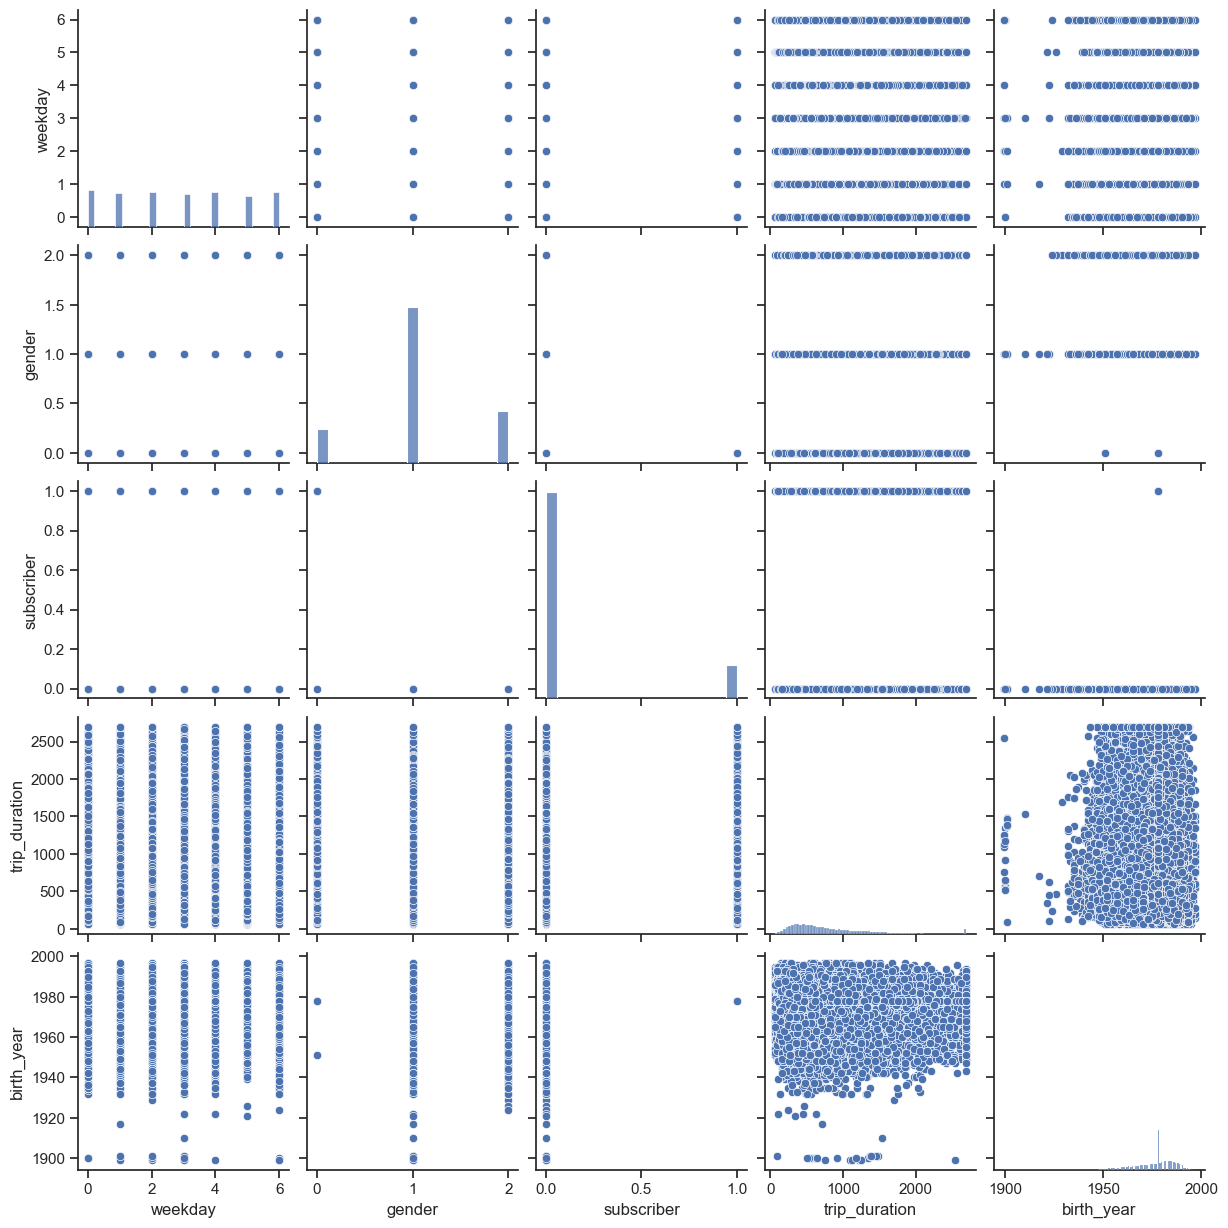

In [82]:
g = sns.pairplot(sub_2)

C:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='trip_duration', ylabel='Count'>

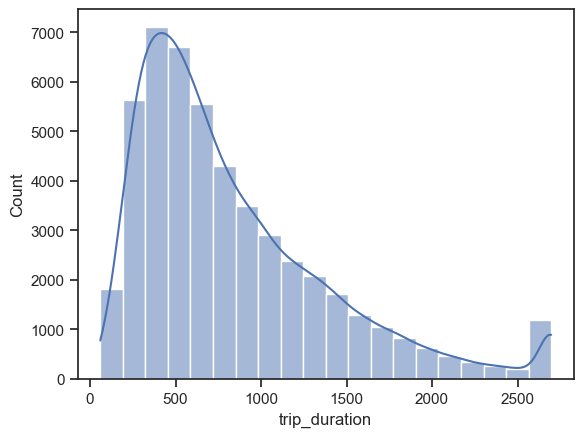

In [83]:
sns.histplot(df['trip_duration'], bins = 20, kde = True)

In [56]:
df_cleaned.loc[df_cleaned['trip_duration'] < 1000, 'Trip Category'] = 'Short Trip'

In [57]:
df_cleaned.loc[(df_cleaned['trip_duration'] >= 100) & (df_cleaned['trip_duration'] < 2000), 'Trip Category'] = 'Mid Length Trip'

In [58]:
df_cleaned.loc[df_cleaned['trip_duration'] >= 2000, 'Trip Category'] = 'Long Trip'

In [59]:
df_cleaned['Trip Category'].value_counts(dropna=False)

Trip Category
Mid Length Trip    47098
Long Trip           2642
Short Trip           260
Name: count, dtype: int64

In [60]:
df_cleaned.columns

Index(['weekday', 'start_hour', 'start_time', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'Trip category', 'trip_category', 'Trip Category'],
      dtype='object')

C:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\justi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\justi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


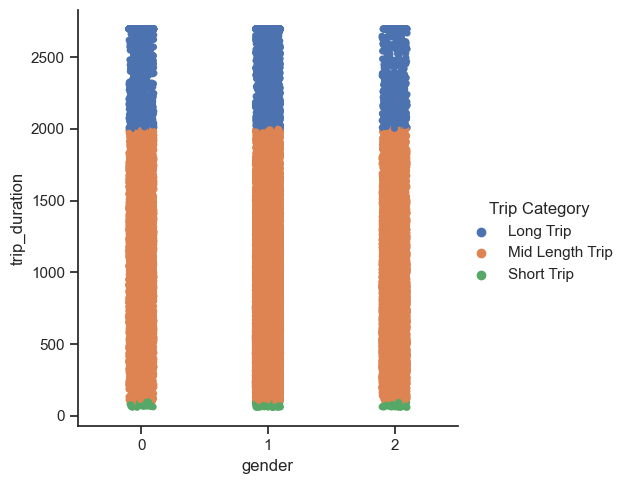

In [71]:
sns.set(style="ticks")
g = sns.catplot(x="gender", y="trip_duration", hue="Trip Category", data=df_cleaned)

In [66]:
g.savefig("out.png") 

In [95]:
contingency_table = pd.crosstab(index=df_cleaned['gender'], 
                                columns=df_cleaned['Trip Category'],
                                normalize=True)

In [96]:
contingency_table

Trip Category,Long Trip,Mid Length Trip,Short Trip
gender,,,
0,0.02016,0.11886,0.00060
1,0.02184,0.62194,0.00344
2,0.01084,0.20116,0.00116


C:\Users\justi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


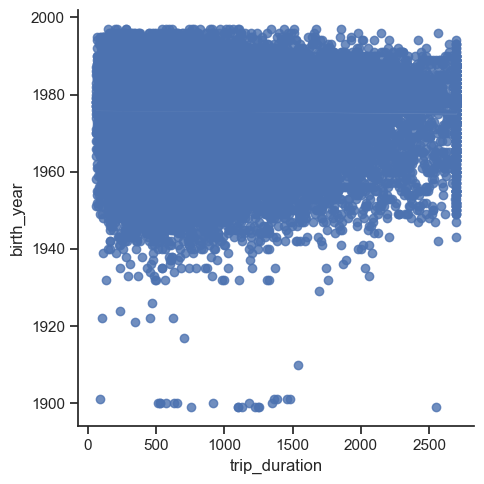

In [97]:
sns.lmplot(x = 'trip_duration', y = 'birth_year', data = df_cleaned)

In [89]:
average_trip_duration = df_cleaned['trip_duration'].mean()

In [90]:
average_trip_duration

838.9829

# 1. What is the most popular age group renting ebikes from citibikes in NYC?
Most biked are being rented by people born between 1960 and 1990
# 2. What is the average length of an ebike rental from citibike in NYC?
838.98 (I don't know the units of measurment)
# 3. Where are most ebikes rented from in NYC
Not known form this step
# 4. Do men or women rent more?
0=Unknown; 1=male; 2=female
It seems males rent more than females
# 5. What days of the week are the most ebikes rented from citibike in NYC?
Weekends are the busiest.

In [93]:
df_cleaned.to_csv(os.path.join(path, 'df_cleaned.csv'), index=False)